In [34]:
#
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



In [35]:
# Chargement du dataset

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("INFORMATIONS GÉNÉRALES DU DATASET")
print("="*80)

df.info()
print(df.head())


INFORMATIONS GÉNÉRALES DU DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [36]:
#Vérification les valeurs manquantes

print("\n Valeurs manquantes par colonnes :")
print(df.isna().sum())



 Valeurs manquantes par colonnes :
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [37]:
#Vérification des doublons

print("Doublons :", df.duplicated().sum())


Doublons : 0


In [38]:
#Analyse statistique

print("ANALYSE STATISTICS")
print("="*80)

# Variable  Numérique

print("Statistique de variable numériques :")
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numeric_cols].describe())


ANALYSE STATISTICS
Statistique de variable numériques :
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.850000
max      72.000000      118.750000


In [39]:
# Analyse de la variable
print("\n Distribution de la variable cible (Churn):")
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100
print(pd.DataFrame({ 'Effectif': churn_counts, 'Pourcentage': churn_pct.round(2)
}))


 Distribution de la variable cible (Churn):
       Effectif  Pourcentage
Churn                       
No         5174        73.46
Yes        1869        26.54


In [40]:
""""Variables Catégorielles importantes"""

print("\n Distribution des variables catégorielles clès :")
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


 Distribution des variables catégorielles clès :

Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


In [41]:
""" Détection des outlier (Valeur aberrante)"""
"""Une valeur qui es très différentes des autres """
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound =Q1 - 1.5 * IQR
    upper_bound =Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) / (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [42]:
"""ANALYSE DES CORRELATIONS"""

# Nettoyer TotalCharges
print("\n Nettoyage de TotalCharges...")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)
print("TotalCharges nettoyé")

#Encoder la variable cible
df['Churn_numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})
print(" Variable Churn encodée (Yes=1, No=0)")

#Variables numériques
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Calculer les corrélations
correlation_with_churn = df[numeric_cols + ['Churn_numeric']].corr()['Churn_numeric'].drop('Churn_numeric')


print("\n CORRÉLATION AVEC CHURN :")
print(correlation_with_churn.sort_values(ascending=False))

# Matrice complète
print("\n MATRICE DE CORRÉLATION :")
print(df[numeric_cols + ['Churn_numeric']].corr().round(3))



 Nettoyage de TotalCharges...
TotalCharges nettoyé
 Variable Churn encodée (Yes=1, No=0)

 CORRÉLATION AVEC CHURN :
MonthlyCharges    0.193356
TotalCharges     -0.198324
tenure           -0.352229
Name: Churn_numeric, dtype: float64

 MATRICE DE CORRÉLATION :
                tenure  MonthlyCharges  TotalCharges  Churn_numeric
tenure           1.000           0.248         0.826         -0.352
MonthlyCharges   0.248           1.000         0.651          0.193
TotalCharges     0.826           0.651         1.000         -0.198
Churn_numeric   -0.352           0.193        -0.198          1.000


Graphique sauvegardé: correlation_heatmap.png


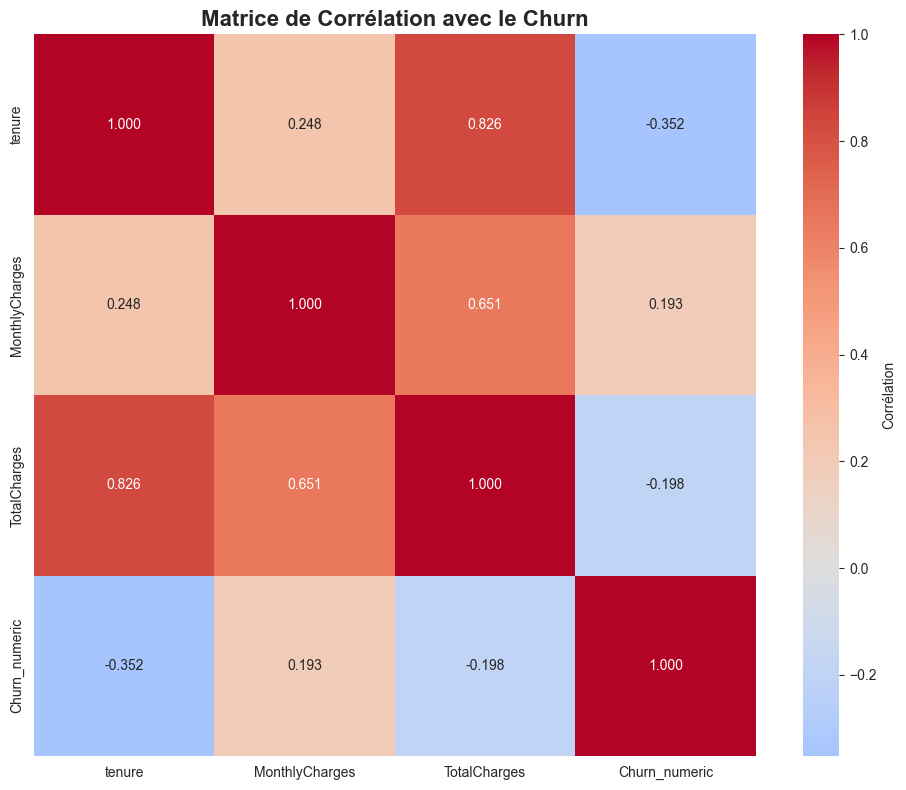

In [43]:

# Heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols + ['Churn_numeric']].corr(),
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0,
            cbar_kws={'label': 'Corrélation'})
plt.title('Matrice de Corrélation avec le Churn', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("Graphique sauvegardé: correlation_heatmap.png")
plt.show()

In [46]:
#SEPARATION DES VARIABLES

X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"\n Variables explicatives (X) : {X.shape[1]} colonnes")
print(f"Variable cible (y) : {y.name}")
print(f"Distribution de y :")
print(f"   - No  : {(y == 'No').sum()} ({(y == 'No').sum()/len(y)*100:.2f}%)")
print(f"   - Yes : {(y == 'Yes').sum()} ({(y == 'Yes').sum()/len(y)*100:.2f}%)")

# Identifier les types de variables
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

print(f"\n Types de variables :")
print(f"   • Variables numériques ({len(numeric_features)}) : {numeric_features}")
print(f"   • Variables catégorielles ({len(categorical_features)}) : {len(categorical_features)} variables")



 Variables explicatives (X) : 21 colonnes
Variable cible (y) : Churn
Distribution de y :
   - No  : 5174 (73.46%)
   - Yes : 1869 (26.54%)

 Types de variables :
   • Variables numériques (5) : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn_numeric']
   • Variables catégorielles (16) : 16 variables


In [59]:

#NORMALISATION DES DONNÉES
print("NORMALISATION DES DONNÉES")
print("="*80)
print(f" Train : {X_train.shape[0]} lignes")
print(f" Test  : {X_test.shape[0]} lignes")

# NORMALISATION (STANDARDSCALER)
print("\n STATISTIQUES AVANT NORMALISATION :")
print("-"*60)
print(X_train[numeric_features].describe().round(2))

print("\n Application de StandardScaler...")
print("-"*80)
print(" Normalisation terminée !")

print("\n STATISTIQUES APRÈS NORMALISATION :")
print("-"*60)
print(X_train_scaled[numeric_features].describe().round(4))

print("="*80)
print(" PRÊT POUR LA MODÉLISATION KNN !")


NORMALISATION DES DONNÉES
 Train : 5634 lignes
 Test  : 1409 lignes

 STATISTIQUES AVANT NORMALISATION (Train) :
------------------------------------------------------------
        tenure  MonthlyCharges  TotalCharges
count  5634.00         5634.00       5634.00
mean     32.49           64.93       2299.33
std      24.57           30.14       2279.20
min       0.00           18.40          0.00
25%       9.00           35.66        402.98
50%      29.00           70.50       1394.92
75%      55.00           90.00       3835.82
max      72.00          118.75       8684.80

 Application de StandardScaler...
--------------------------------------------------------------------------------
 Normalisation terminée !

 STATISTIQUES APRÈS NORMALISATION (Train) :
------------------------------------------------------------
          tenure  MonthlyCharges  TotalCharges
count  5634.0000       5634.0000     5634.0000
mean     -0.0000         -0.0000        0.0000
std       1.0001          1.0001